# Lab One: Exploring Table Data

#### By: Harrison Noble and Henry Lambson 

## 1. Business Understanding

According to UCI [Ref 1], this dataset contains "red and white wine varients of the Portuguese Vinho Verde wine". Two datasets were collected, one for the reds and one for the whites.

The data was gathered via physical/chemical tests (such as acid content) and judgements of the quality. The value for the quality was determined by having three wine testers try each wine and score it from 0 to 10, with 0 being very bad and 10 being excellent. The median of the three scores was used in the final dataset.

The wine quality dataset contains 1599 red wine samples and 4898 white wine samples, with 6497 samples in total. There are 12 unique features including the quality value. Each feature is aside from the quality is numerical, with the quality being categorical.      

Through analyzing this dataset, we will be able to help predict which wines should continue to be tested in order to eventually reach the market. If we were to design the algorithm for high quality wine testers, we would only want to send them the samples that are deemed to be a 7 or higher on the quality by the algorithm. In order to accomplish this, we will want to reduce the amount of false-negatives in order to ensure that no top quality wine is passed up on. To this end, some underperforming wines will pass through as false-positives. We accept this tradeoff so long that the algorithm narrows down the samples by 60%, assuming the majority of the wines are rated below 7. This could be useful for wine testers as it cuts down the total amount of samples that would need to be tested.

Additionally, this dataset could be used to predict how the chemical or physical compenents of the wine correspond to the quality. By exploring the relationship between the features provided and the quality of the wine, we will be able to determine which feature values or ratios correspond to higher qualities. Wine producers would be interested in this result as they could determine which features and how much of them lead to higher quality wines. For this model to work well, we would like to limit the false positive rate so that we ensure that the producers are not given poor predictions.


Dataset: Wine Quality URL: https://archive.ics.uci.edu/ml/datasets/wine+quality

## 2. Data Understanding

### 2.1 Data Description

In [2]:
import pandas as pd
import numpy as np

# load red wine dataset into pandas and give it a color attribute (R)
df_red = pd.read_csv('./winequality-red.csv', sep=';')
df_red['color'] = 0

# load white wine dataset into pandas and give it a color attribute (W)
df_white = pd.read_csv('./winequality-white.csv', sep=';')
df_white['color'] = 1

# combine dataset into one pandas dataframe
df_full = pd.concat([df_red, df_white], axis=0, ignore_index=True)

#print number of rows in each df to confirm all data is loaded in
print('Length of red wine dataset:', df_red.shape[0])
print('Length of white wine dataset:', df_white.shape[0])
print('Length of all wine dataset:', df_full.shape[0])

df_full.head()

Length of red wine dataset: 1599
Length of white wine dataset: 4898
Length of all wine dataset: 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Although the quality attribute is a number, we decided to consider it as categorical because the number maps to a description of the wine quality (ex: 5 is average). Additionally, we added the color attribute to distinguish white wine (0) from red wine (1) so that we could combine the two datasets into one dataframe.

In [3]:
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None


Based on the dataframe info function, we can see that there are no missing values as there are 6497 non-null values for each attribute.

To further confirm this, we decided to run the describe function on the dataset to output statistical information regarding the dataframe. If there was obscure data within this dataset, it would become apparent in the mean, min, or max values for each feature.

In [4]:
#summarize data
df_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


As we can see, this table shows no outlandish values. One thing we decided to investigate was the max values for "free sulfur dioxide" and "total sulfur dioxide" as they are many standard deviations away from the mean. In manually checking the dataset, both max values appeared in the same instance, therefore we consider this instance to be an outlier. 

In [5]:
#data description dataframe, idea taken from reference 4
description_df = pd.DataFrame()

description_df['Attributes'] = df_full.columns
#Description of each attribute taken from reference 2
description_df['Description'] = ['grams of tartaric acid per liter', 
                                 'grams of acetic acid per liter',
                                 'grams of citric acid per liter',
                                 'grams of sugar per liter remaining after fermentation stops',
                                 'grams of sodium chloride (salt) per liter',
                                 'milligrams of free form sulfur dioxide per liter',
                                 'milligrams of free form and bound forms of sulfur dioxide per liter',
                                 'density of the wine (grams per cubic centimeter)',
                                 'the pH value of the wine',
                                 'grams of potassium sulphate per liter',
                                 'percent of alcohol by volume',
                                 'median score given by wine tasters',
                                 'type/color of wine']
description_df['Scales'] = ['ratio', 'ratio', 'ratio', 'ratio', 
                            'ratio', 'ratio', 'ratio', 'ratio', 
                            'interval', 'ratio', 'ratio', 'ordinal', 'nominal']
description_df['Discrete\Continuous'] = ['Continuous', 'Continuous', 'Continuous',
                                        'Continuous', 'Continuous', 'Continuous',
                                        'Continuous', 'Continuous', 'Continuous',
                                        'Continuous', 'Continuous', 'Discrete',
                                        'Discrete']
description_df['Range'] = ['3.8 - 15.9', '0.08 - 1.58', '0.0 - 1.66', '0.6 - 65.8',
                            '0.009 - 0.611', '1.0 - 289.0', '6.0 - 440.0',
                            '0.98711 - 1.03898', '2.72 - 4.01', '0.22 - 2.0',
                            '8.0 - 14.9', '3 - 9', '0: red; 1: white']

description_df

,Attributes,Description,Scales,Discrete\Continuous,Range
0,fixed acidity,grams of tartaric acid per liter,ratio,Continuous,3.8 - 15.9
1,volatile acidity,grams of acetic acid per liter,ratio,Continuous,0.08 - 1.58
2,citric acid,grams of citric acid per liter,ratio,Continuous,0.0 - 1.66
3,residual sugar,grams of sugar per liter remaining after ferme...,ratio,Continuous,0.6 - 65.8
4,chlorides,grams of sodium chloride (salt) per liter,ratio,Continuous,0.009 - 0.611
5,free sulfur dioxide,milligrams of free form sulfur dioxide per liter,ratio,Continuous,1.0 - 289.0
6,total sulfur dioxide,milligrams of free form and bound forms of sul...,ratio,Continuous,6.0 - 440.0
7,density,density of the wine (grams per cubic centimeter),ratio,Continuous,0.98711 - 1.03898
8,pH,the pH value of the wine,interval,Continuous,2.72 - 4.01
9,sulphates,grams of potassium sulphate per liter,ratio,Continuous,0.22 - 2.0


The above table gives a description of each feature, type of data (scales), whether it is discrete or continuous, and the max and min value (range). 

Each continuous feature will be represented by a float and each discrete value will be represented by an integer. 

### 2.2 Data Quality

As shown above, we have no missing data in our dataset, meaning no imputation is necessary. If there were any missing values we would use mean or median imputation for the numerical features and throw out any instances that were missing a quality value. 

Let's now explore if there are duplicate instances or any extreme outliers. 

In [6]:
#find all duplicated instances
duplicated_indexes = df_full.duplicated()
print('Duplicated instances:', len(df_full[duplicated_indexes]))

# pd.set_option("display.max_rows", None, "display.max_columns", None)
# duplicated_whites = df_white.duplicated()
# df_white[duplicated_whites].sort_values(by=['fixed acidity', 'volatile acidity'])

# duplicated_reds = df_red.duplicated()
# df_red[duplicated_reds].sort_values(by=['fixed acidity', 'volatile acidity'])

Duplicated instances: 1177


Given this output we can see that pandas calculated 1177 potential duplicated instances. Through our manual inspection of alleged duplicates (commented out lines), we decided to keep these in the dataset. While we did see there were instances that appeared to be duplicated, the vast majority of the instances in the duplicated_reds and duplicated_whites datasets did not seem to be actual duplicates. From our understanding, the "sort_values" function would display the duplicates next to each other in the table. In our case, we saw this for very few instances, leading us to keep all the data. 

Additionally, we have no way of verifying if the instances that seemed to be duplicates were actually duplicated because this dataset does not contain names or ID values for each wine. 

Now we will look into potential outliers of the dataset. Looking at the description of the dataframe (describe function) we can see that there are some values that could be outliers, most notably the max values for fixed acidity, residual sugars, free sulfur dioxide and total sulfur dioxide. To determine whether there are outliers, we will be plotting histograms of these attributes.

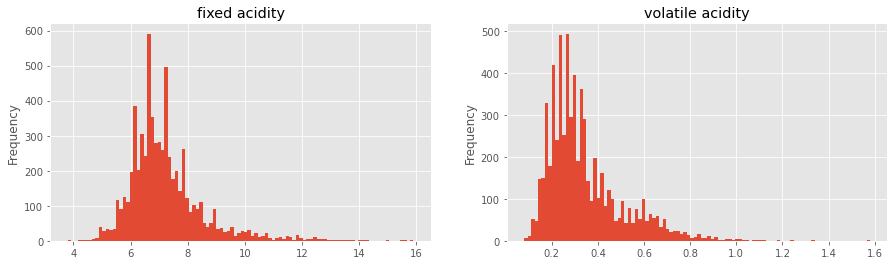

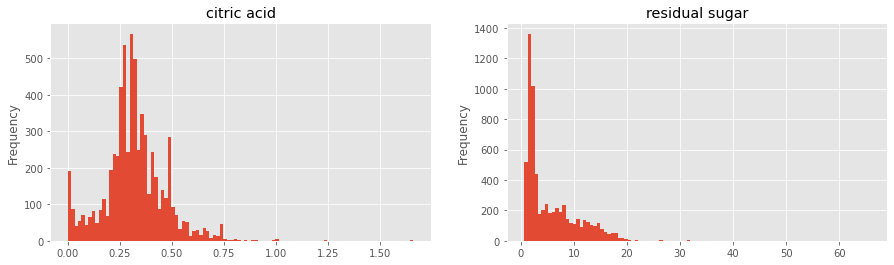

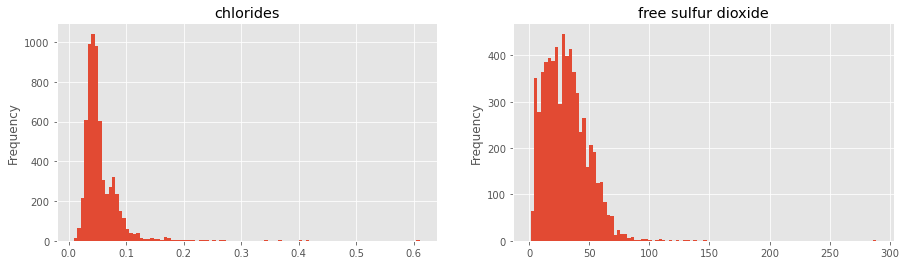

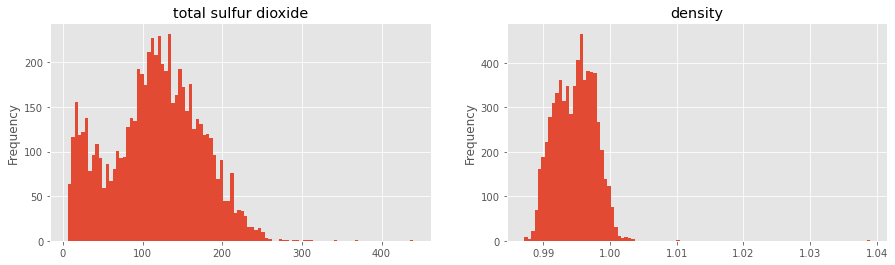

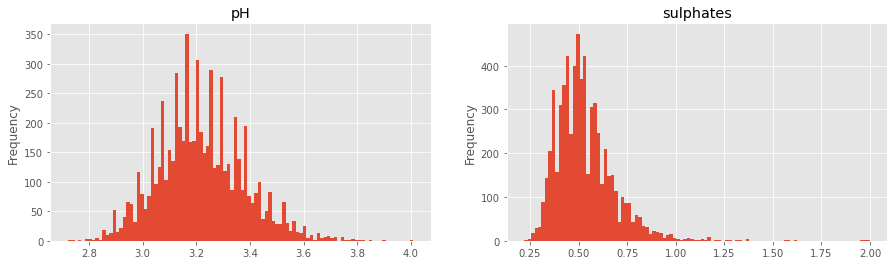

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

fig = None
for count, val in enumerate(df_full.columns):
    if (count + 1) % 2 == 1:
        fig = plt.figure(figsize=(15,4))
        plt.subplot(1,2,1)
    else:
        plt.subplot(1,2,2)
        
    df_full[val].plot.hist(bins=100, title=val)
    
    if (count + 1) % 2 == 0:
        plt.show()
        
    if count == 9:
        break
    

As we can see from these histograms, all attributes are skewed right with clear potential outliers. To get rid of these outliers, we are going to use z-score and get rid of all rows with an absolute value z-score of 3 or higher.

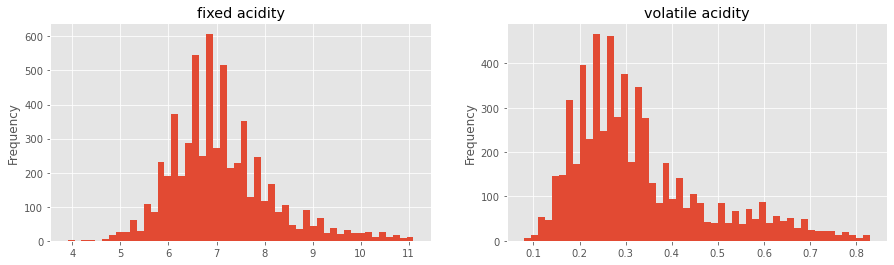

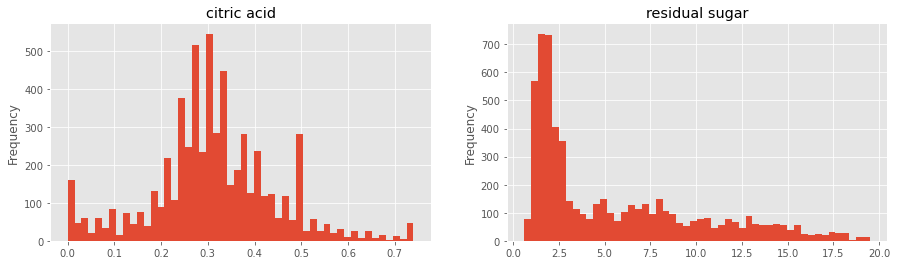

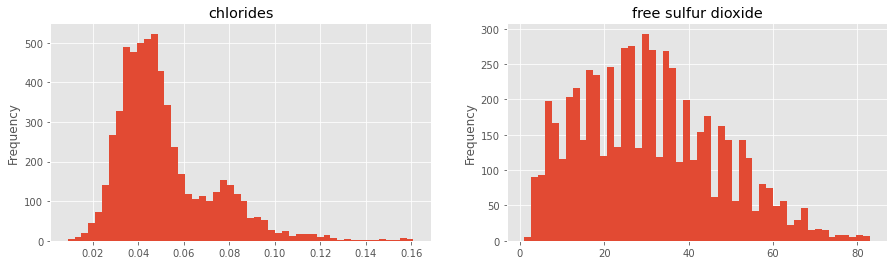

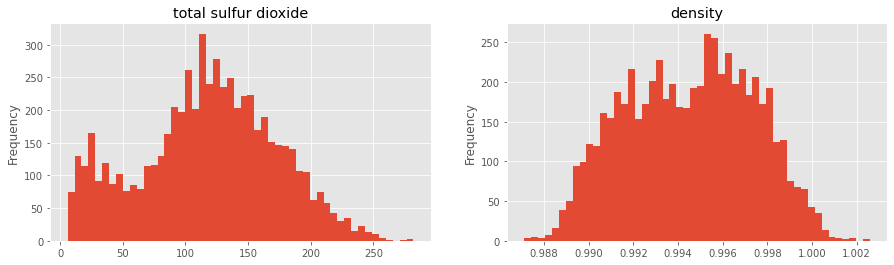

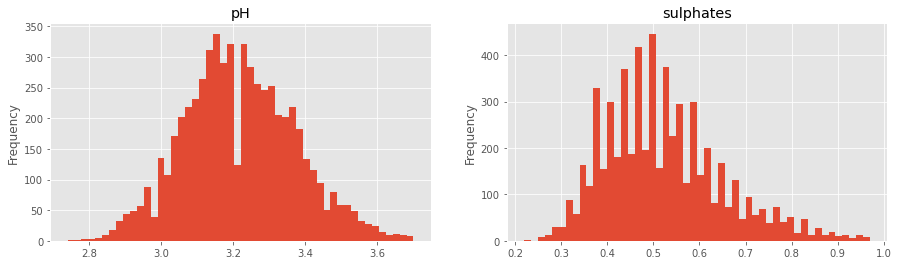

6009


In [8]:
from scipy import stats

to_use = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
         'pH', 'sulphates', 'alcohol']
#code found from reference 5
df_full = df_full[(np.abs(stats.zscore(df_full[to_use])) < 3).all(axis=1)]

plt.style.use('ggplot')
fig = None

for count, val in enumerate(df_full.columns):
    if (count + 1) % 2 == 1:
        fig = plt.figure(figsize=(15,4))
        plt.subplot(1,2,1)
    else:
        plt.subplot(1,2,2)
        
    df_full[val].plot.hist(bins=50, title=val)
    
    if (count + 1) % 2 == 0:
        plt.show()
        
    if count == 9:
        break

print(len(df_full))

As we can now see from the histograms, there is much less skew in the data and there were about 400 outliers deleted from our dataset. We picked a z-score of 3 because we wanted to keep as much data as possible while also excluding data whose values do not fall within 3 standard deviations away from the mean. It should be noted that we decided not to remove rows based on outliers from quality, and color attributes. This is because wines with a quality of a 9 or 3 were more than 3 standard deviations away from the mean.

## 3. Data Visualization

- 2 points: Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. __Note:__ You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical and at least one numeric. 
- 2.5 points: Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data.  __Important:__ Interpret the implications for each visualization. 

Through eliminating outliers in our dataset, we can already visualize some interesting attributes of our data. Let's now dive deeper into the characteristics

In [9]:
quality_grouping = df_full.groupby(by='quality')
for qual, group in quality_grouping:
    print('There are', len(group), 'wines with a quality of', qual)
    
print('=======================================')

#we know white wines have a color attribute of 1, so summing the color attribute
#of the groupings will give us the total number of white wines in the group
for qual, group in quality_grouping:
    print('There are', group.color.sum(), 'white wines with a quality of', qual)
    
print('=======================================')

#on the contrary, taking the total count of the color attribute and subtracting the
#sum of the color attribute will give us total number of red wines in the group
for qual, group in quality_grouping:
    print('There are', (group.color.count() - group.color.sum()), 'red wines with a quality of', qual)

There are 15 wines with a quality of 3
There are 184 wines with a quality of 4
There are 1958 wines with a quality of 5
There are 2636 wines with a quality of 6
There are 1027 wines with a quality of 7
There are 184 wines with a quality of 8
There are 5 wines with a quality of 9
There are 13 white wines with a quality of 3
There are 154 white wines with a quality of 4
There are 1399 white wines with a quality of 5
There are 2117 white wines with a quality of 6
There are 871 white wines with a quality of 7
There are 171 white wines with a quality of 8
There are 5 white wines with a quality of 9
There are 2 red wines with a quality of 3
There are 30 red wines with a quality of 4
There are 559 red wines with a quality of 5
There are 519 red wines with a quality of 6
There are 156 red wines with a quality of 7
There are 13 red wines with a quality of 8
There are 0 red wines with a quality of 9


<AxesSubplot:xlabel='quality', ylabel='count'>

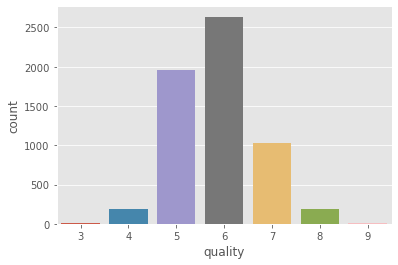

In [10]:
import seaborn as sns

sns.countplot(x='quality', data=df_full)

<ipython-input-11-fdc64ddcad5d>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


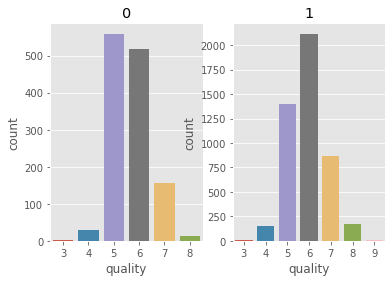

In [11]:
fig, ax = plt.subplots(1, 2)

color_grp = df_full.groupby(by='color')

count = 0
for clr, grp in color_grp:
    sns.countplot(x='quality', data=grp, ax=ax[count]).set_title(clr)
    count += 1

fig.show()

Note: 0 is red wines and 1 is white wines

Looking at this data, as a whole, the majority of the wines are rated as a 6. Breaking the wines down by color shows that the majority of the red wines are rated at a 5 while the majority of whites are rated at a 6. Because there are so many more white wine instances, the mode of the entire dataset is a 6. 

Both white and red wines contain instances rated at a 3, while only the white dataset contains instances rated at a 9. This could be due to sample size or bias of the testers. 

<AxesSubplot:xlabel='color', ylabel='quality mean'>

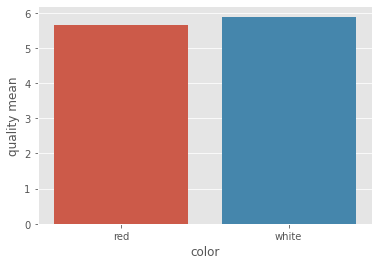

In [23]:
red_mean = df_full[df_full.color==0].quality.mean() 
white_mean = df_full[df_full.color==1].quality.mean() 
d = {'color': ['red','white'], 'quality mean': [red_mean,white_mean]}
d = pd.DataFrame(data=d)

sns.barplot(x='color',y='quality mean',data=d)

From this graph we can see more detail on the mean quality of the each color of wine. The graph shows that the two means are quite similar, however the white mean is slightly higher. As seen in the two histograms displaying the distribution of the counts of the wines above, the white wine's mode of 6 is much higher than any other quality, while the red wine's mode of 5 only has around 50 more instances than those with a rating of 6. This is the main reason as to why the means of the two distributions are so close together.  

Now lets take a look at the physical and chemical differences between red and white wines. First off, we will look deeper into the residual sugar and chlorides attributes as their histogram distributions above were quite interesting.

C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='color', ylabel='residual sugar'>

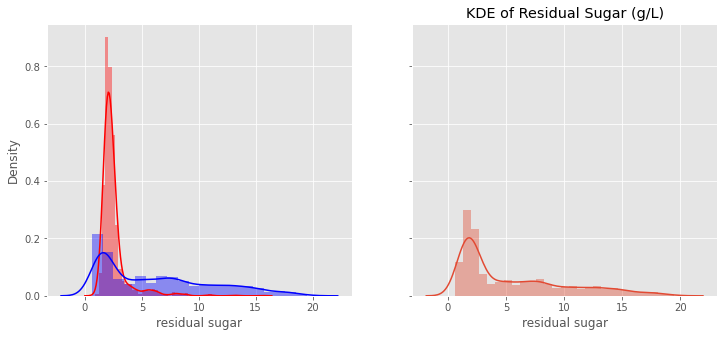

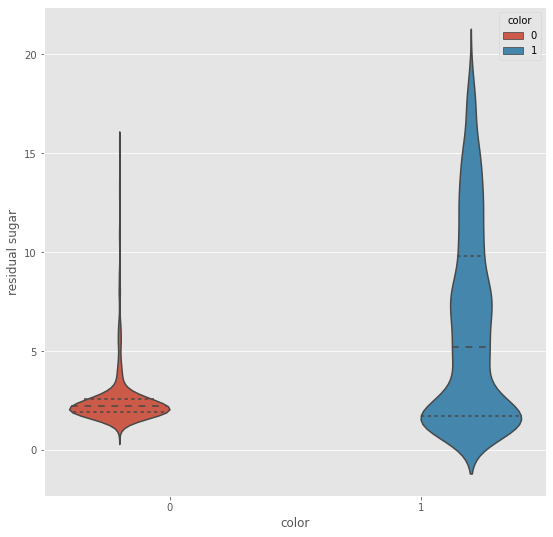

In [12]:
color_grp = df_full.groupby(by='color')

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, sharey=True, figsize=(12, 5))
for clr, grp in color_grp:
    plt.title('KDE of Residual Sugar (g/L)')
    sns.distplot(grp['residual sugar'], color='blue' if clr else 'red', ax=ax1)

sns.distplot(df_full['residual sugar'], ax=ax2)

fig, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='color', y='residual sugar', inner='quartile',
               hue='color', data=df_full)

Note: On the left KDE plot, white wine KDE is blue and red wine KDE is red.

As shown by the kernel density estimate plot and the violin plot, the majority of the wine samples had residual sugar in the 0 to 5 range. The violin plot shows that for a for a wine with residual sugar past 5 grams, it is likely to be white, however there still exists some red wine with residual sugar of past 15 grams.

C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='color', ylabel='chlorides'>

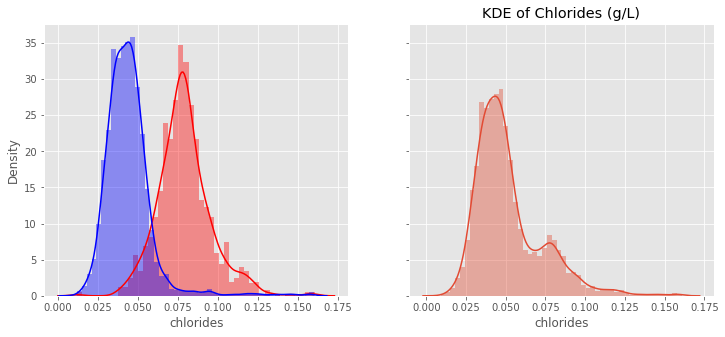

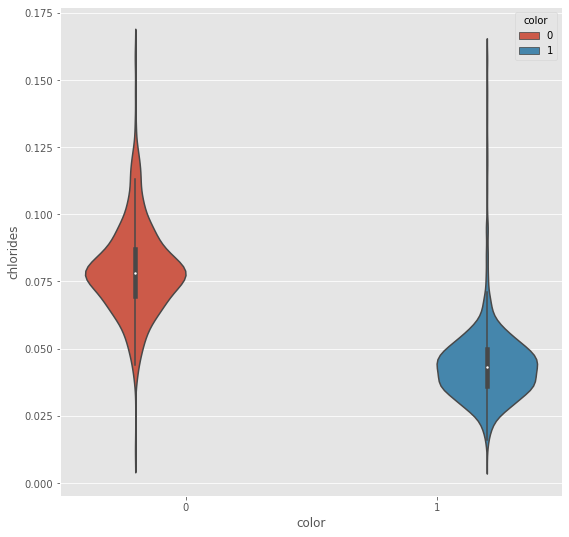

In [13]:
color_grp = df_full.groupby(by='color')

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, sharey=True, figsize=(12, 5))
for clr, grp in color_grp:
    sns.distplot(grp.chlorides, color='blue' if clr else 'red', ax=ax1)
    plt.title('KDE of Chlorides (g/L)')

sns.distplot(df_full.chlorides, ax=ax2)

fig, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='color', y='chlorides', inner='box',
               hue='color', data=df_full)

Note: On the left KDE plot, white wine KDE is blue and red wine KDE is red.

The kernel density estimate and the violin plot show where red and white wines lie in the distribution. The violin plot tells us that the white wines are mainly in the .025 to .075 range while the reds are in the .05 to .125 range. Using this information and the fact that there are many more white wines in the dataset, we know that the large peak in the kernel density estimate is primarily comprised of white wines and the smaller peak in the middle of the plot is red wines. From the violin plot it appears that the red wines are more normally distributed.

We also wanted to take a look at an attribute that had more of a normal distribution to see similarities between the white and red wine values.  

C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\henry\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='color', ylabel='pH'>

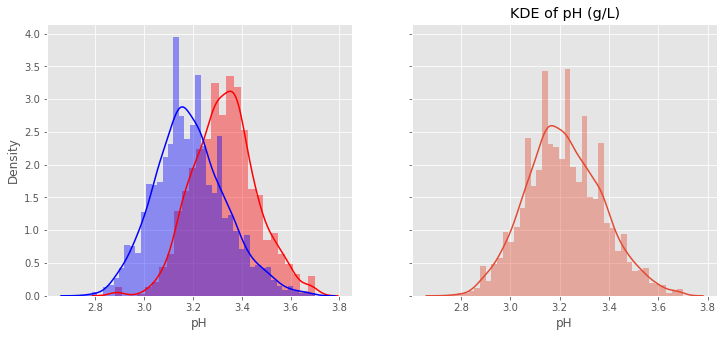

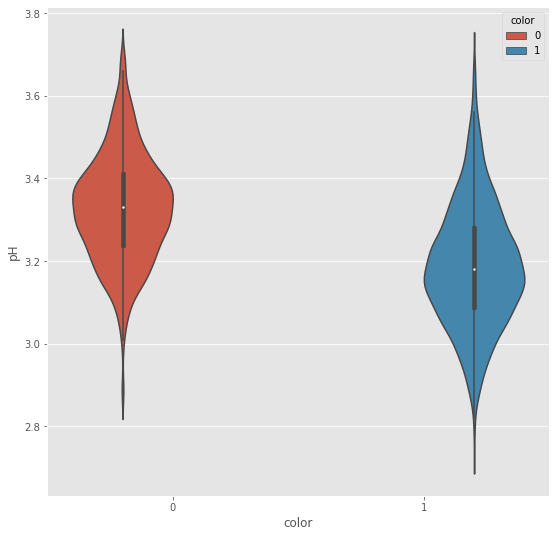

In [14]:
color_grp = df_full.groupby(by='color')

fig, (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, sharey=True, figsize=(12, 5))
for clr, grp in color_grp:
    sns.distplot(grp.pH, color='blue' if clr else 'red', ax=ax1)
    plt.title('KDE of pH (g/L)')

sns.distplot(df_full.pH, ax=ax2)

fig, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x='color', y='pH', inner='box',
               hue='color', data=df_full)

Note: Blue is white wines and red is red wines for the left KDE plot.

The KDE plot of the seperate datasets shows how both the reds and the whites follow a fairly normal distribution, the main difference between the two is where the median of their distribution lies. For the whites the median is just under 3.2 and for the reds the median is just over 3.3. Looking at the KDE plot we can see that the two distributions begin to overlap as the white distribution begins falling off and the red distribution begins building up. This leads to the two peaks to appear in the combined distribution with the space in between them to be much lower.

### 3.2 Interesting Questions

After exploring the data using many different plots, we decided to consider these 3 questions:

1. How do the attributes of each wine color relate to one another?

2. What physical or chemical aspect of wines affect quality the most? 

3. What are the biggest physical or chemical differences between white and red wines?

#### 3.2.1 Correlation of attributes

We decided to investigate the attributes based on the color of wine, starting with the red wines.

<AxesSubplot:title={'center':'Red wine attribute correlation'}>

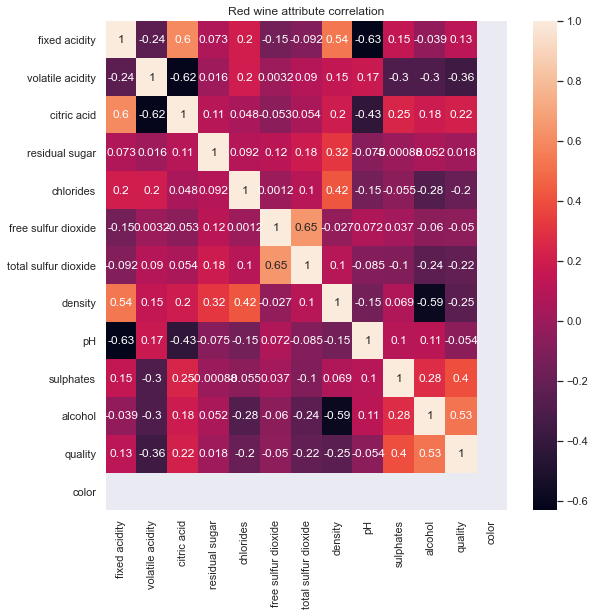

In [43]:
cmap = sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Red wine attribute correlation')
sns.heatmap(df_full[df_full.color == 0].corr(), cmap=cmap, annot=True)

We will analyze this heatmap by identifying which attributes are the most or least correlated. 

Fixed acidity: Highly correlated with citric acid and density, while also being inversely correlated to pH. As acid concentration goes up, pH will get lower and it seems that this type of acid is the main factor in increasing density in red wine.

Volatile acidity: Highly inversely correlated to citric acid, and interestingly correlated to pH. Even though this is an acid, the data suggests that as more of it is added, pH will increase. This could be because volatile acidity is so inversely correlated to ciric acid as well as fixed acidity, leading to less acid overall.

Citric acid: As previously discussed, citric acid is correlated to fixed acidity and pH while being inversely correlated to volatile acidity. Citric acid is also fairly correlated to sulphates, indicating that a wine with high citric acid will also contain a good amount of sulphates. 

Residual Sugar: The only attribute that is significantly correlated to residual sugar is density, which makes sense as sugar would increase the density of the wine.

Chlorides: Similar to residual sugar, the only attribute that is significantly correlated is density.

Free Sulfur Dioxide, Total Sulfur Dioxide: Both of these attributes are only significantly correlated with each other, which makes perfect sense as total sulfur dioxide is the free sulfur dioxides plus the bound sulfur dioxides.

Density: Correlated with the attributes discussed above, but is inveresly correlated with alcohol percentage. Ethyl alcohol is not very dense which makes it so the more alcohol, the less dense the wine.

pH: Correlations previously discussed. 

Sulphates: Correlated to alcohol. The more sulphates in the wine, the the higher the alcohol percentage is likely to be. 

Alcohol: Correlations and inverse correlations previously discussed.

<AxesSubplot:title={'center':'White wine attribute correlation'}>

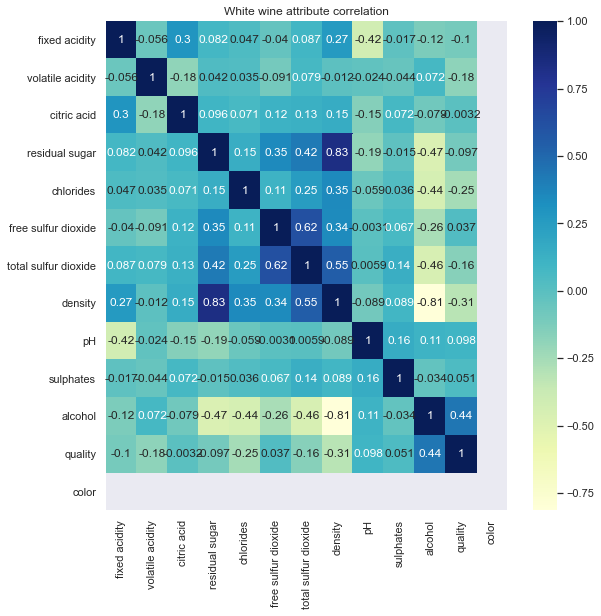

In [37]:
#cmap = sns.set(style="Blues")

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('White wine attribute correlation')
sns.heatmap(df_full[df_full.color == 1].corr(), cmap="YlGnBu", annot=True)

Fixed Acidity: Similarly to the reds, correlated to citric acid and density as well as inversely correlated to pH.

Volatile Acidity: No significant correlation or inverse correlation.

Citric Acid: Only significantly correlated to fixed acidity

Residual Sugar: Highly correlated to density, much more so than in the red wines. Also correlated to free and total sulfur dioxides, again more so than in the reds. Inversely correlated to alcohol percentage.

Chlorides: Correlated to density and inversely correlated to alcohol percentage.

Free Sulfur Dioxide, Total Sulfur Dioxide: Correlated to each other same as with the reds, as well as density.

Density: Correlations discussed previosuly. Inversely correlated to alcohol but at a higher rate than in the red wines.

pH: Correlated to fixed acidity.

Sulphates: No significant correlation or inverse correlation

Alcohol: No correlations other than quality, inverse correlations previously discussed.

#### 3.2.2 Which attributes affect quality the most?

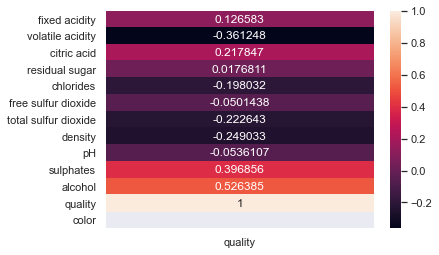

In [41]:
df_redQual = pd.DataFrame(df_full[df_full.color == 0].corr()['quality'])


sns.heatmap(df_redQual, annot=True, fmt="g", cmap=cmap)

plt.show()

Note: This heatmap is only for the red wines.

As the seen in the heatmap, surprisingly, the attribute that is the most correlated to quality is alcohol percentage. So according to our dataset, the more alcohol a red wine has, the better it will be. This may be due to how few wines were rated as an 8 in the red dataset, with those wines containing higher alcohol content. The attribute that also significantly correlates to quality is sulphates, which as we discussed earlier, is correlated to alcohol. So the more alcohol in a red wine, the more sulphates and the higher the quality. 

The attribute that is most inversely correlated to quality is volatile acidity. So our dataset suggests to limit the amount of volatile acidity in wines in order to improve the quality. High concentrations of volatile acidity "lead[s] to an unpleasant, vinegar taste" [Ref 2]. Density is also inversely correlated to quality, and, as discussed earlier, is also inversely correlated to alcohol percentage. As alcohol percentage lowers, density increases, and quality lowers. Finally, total sulfur dioxide is the last attribute that is significantly inversly correlated to quality, however free sulfur dioxide is not. This leads us to believe that free sulfur dioxides do not have much of an affect on quality while bound sulfur dioxides are what is causing the inverse correlation.    

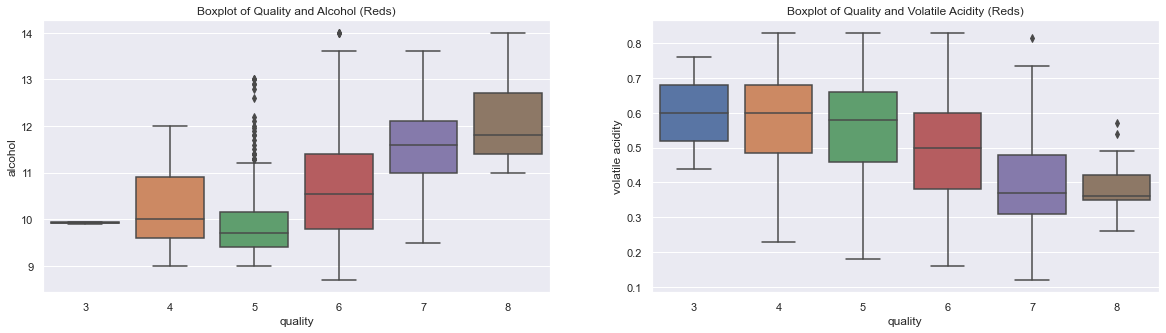

In [45]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x='quality', y='alcohol', data=df_full[df_full.color == 0])
plt.title("Boxplot of Quality and Alcohol (Reds)")

plt.subplot(1,2,2)
sns.boxplot(x='quality', y='volatile acidity', data=df_full[df_full.color == 0])
plt.title("Boxplot of Quality and Volatile Acidity (Reds)")
plt.show()


These boxplots confirm our previous claims showing that generally as alcohol content increases, quality also increases. Conversly, as volatile acidity decreases, quality increases. 

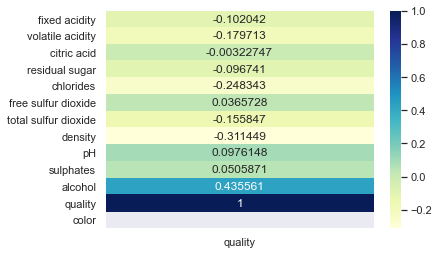

In [39]:
df_whiteQual = pd.DataFrame(df_full[df_full.color == 1].corr()['quality'])


sns.heatmap(df_whiteQual, annot=True, fmt="g", cmap='YlGnBu')

plt.show()

Note: This heatmap is for only white wines

Similar to the reds, alcohol content is the main attribute correlated to quality. Again, this may be because of how few samples were rated 8 or 9. With white wines, sulphates do not have nearly as much of an impact as they did in the reds. There is no other attribute with significant correlation to quality.

Again similar to the red wines, density is inversely correlated to the quality, with the same reasoning as to why. The higher the alcohol, the lower the density, and the higher the quality. The other attribute that is inversly correlated to quality is chlorides, which, as shown above, is correlated to density and inversely correlated to alcohol. In the case of white wines, it seems that the more chlorides, the lower the alcohol and by extension, the lower the quality. Interestingly, residual sugar, free sulfur dioxide and total sulfur dioxide are inversly correlated to alcohol, but are not significantly correlated to quality.

## 4. Exceptional Work (Dimensionality Reduction With PCA)

- You have free reign to provide any additional analyses. 
- One idea (required for 7000 level students): implement dimensionality reduction using uniform manifold approximation and projection (UMAP), then visualize and interpret the results. Give an explanation of UMAP dimensionality reduction methods. You may be interested in the following information: https://github.com/lmcinnes/umap 

### Reference

[1] UCI Machine Learning Repository. Wine Quality Dataset. https://archive.ics.uci.edu/ml/datasets/Wine+Quality

[2] https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html

[3] Penn State Eberly College of Science. Analysis of Wine Quality Data. https://online.stat.psu.edu/stat508/lesson/analysis-wine-quality-data

[4] Graded Example. https://www.dropbox.com/sh/yinn3v3qnzlbep5/AAA-i1u-4ylyxwiCb8nyEDY7a?dl=0&preview=ExampleRendered.html

[5] Z-Score Code. https://intellipaat.com/community/28871/detect-and-exclude-outliers-in-pandas-data-frame